Try to build a classifier for the MNIST dataset that achieves over 97% accuracy
on the test set. Hint: the KNeighborsClassifier works quite well for this task;
you just need to find good hyperparameter values (try a grid search on the
weights and n_neighbors hyperparameters).

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784",version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X = mnist["data"]
y = mnist["target"]

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)


KNeighborsClassifier()

In [21]:
from sklearn.model_selection import cross_val_predict,cross_val_score
cross_val_score(knn_clf,X_train,y_train,cv=3,scoring="accuracy")


array([0.9676 , 0.9671 , 0.96755])

In [23]:
y_train_pred = cross_val_predict(knn_clf,X_train,y_train,cv=3)

In [24]:
from sklearn.metrics import confusion_matrix
cm =  confusion_matrix(y_train,y_train_pred)

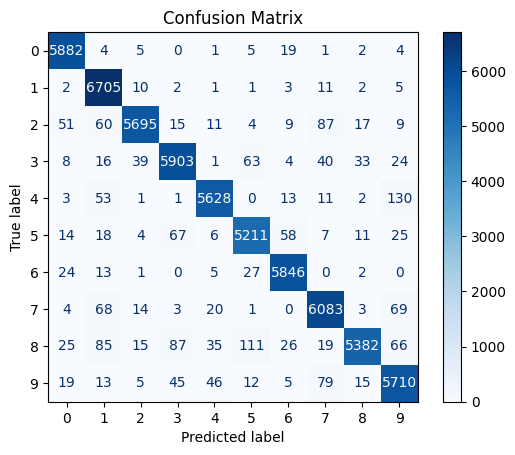

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors' : [3],
    'weights' : ['uniform']

}
grid_search = GridSearchCV(knn_clf, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)
best_knn = grid_search.best_estimator_
print("Test accuracy:", best_knn.score(X_test, y_test))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


Python(24481) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(24482) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(24483) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(24484) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(24485) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(24486) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(24487) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(24488) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV] END .....................n_neighbors=3, weights=uniform; total time= 2.2min
[CV] END .....................n_neighbors=3, weights=uniform; total time= 2.2min
[CV] END .....................n_neighbors=3, weights=uniform; total time= 2.2min
Best parameters: {'n_neighbors': 3, 'weights': 'uniform'}
Best cross-validation accuracy: 0.9681833333333333
Test accuracy: 0.9705
